In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ticktack
from jax import jit
import jax.numpy as jnp
from ticktack import fitting, resample
from scipy.interpolate import interp1d
plt.rcParams['figure.figsize'] = (8.0, 6.0)
#from helper import run_resample, load_IntCal20
import pandas as pd
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import statistics

In [2]:
data = pd.read_csv("../data/brehm21_edit.csv")

<ErrorbarContainer object of 3 artists>

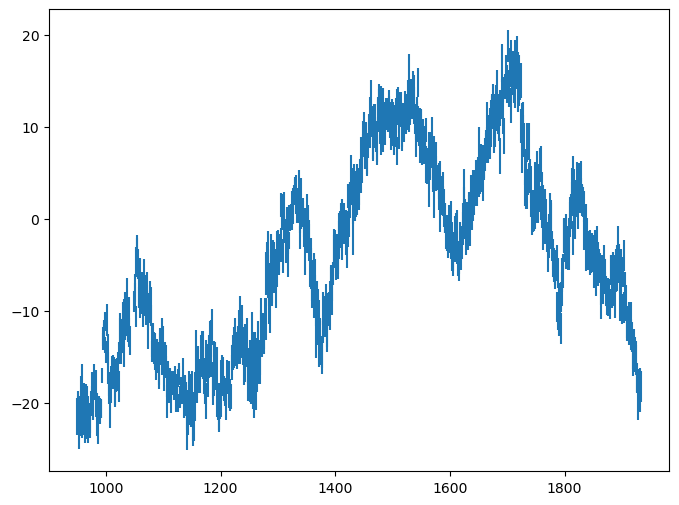

In [3]:
plt.errorbar(data.year, data.d14c, yerr=data.sig_d14c, linestyle='None')

In [4]:
resampler = resample.Resampler()
resampler.load_data(data.year, data.d14c, data.sig_d14c)
resampler.annual = np.arange(np.ceil(resampler.start), np.floor(resampler.end + 1))
new_signal = resampler.signal_resample()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [5]:
f = interp1d(resampler.x, resampler.y, kind="cubic")
interpolation = f(resampler.annual)
sig = resampler.bandpass_super_gaussian(interpolation, l=1./9.677, sz=0.05, order=30)

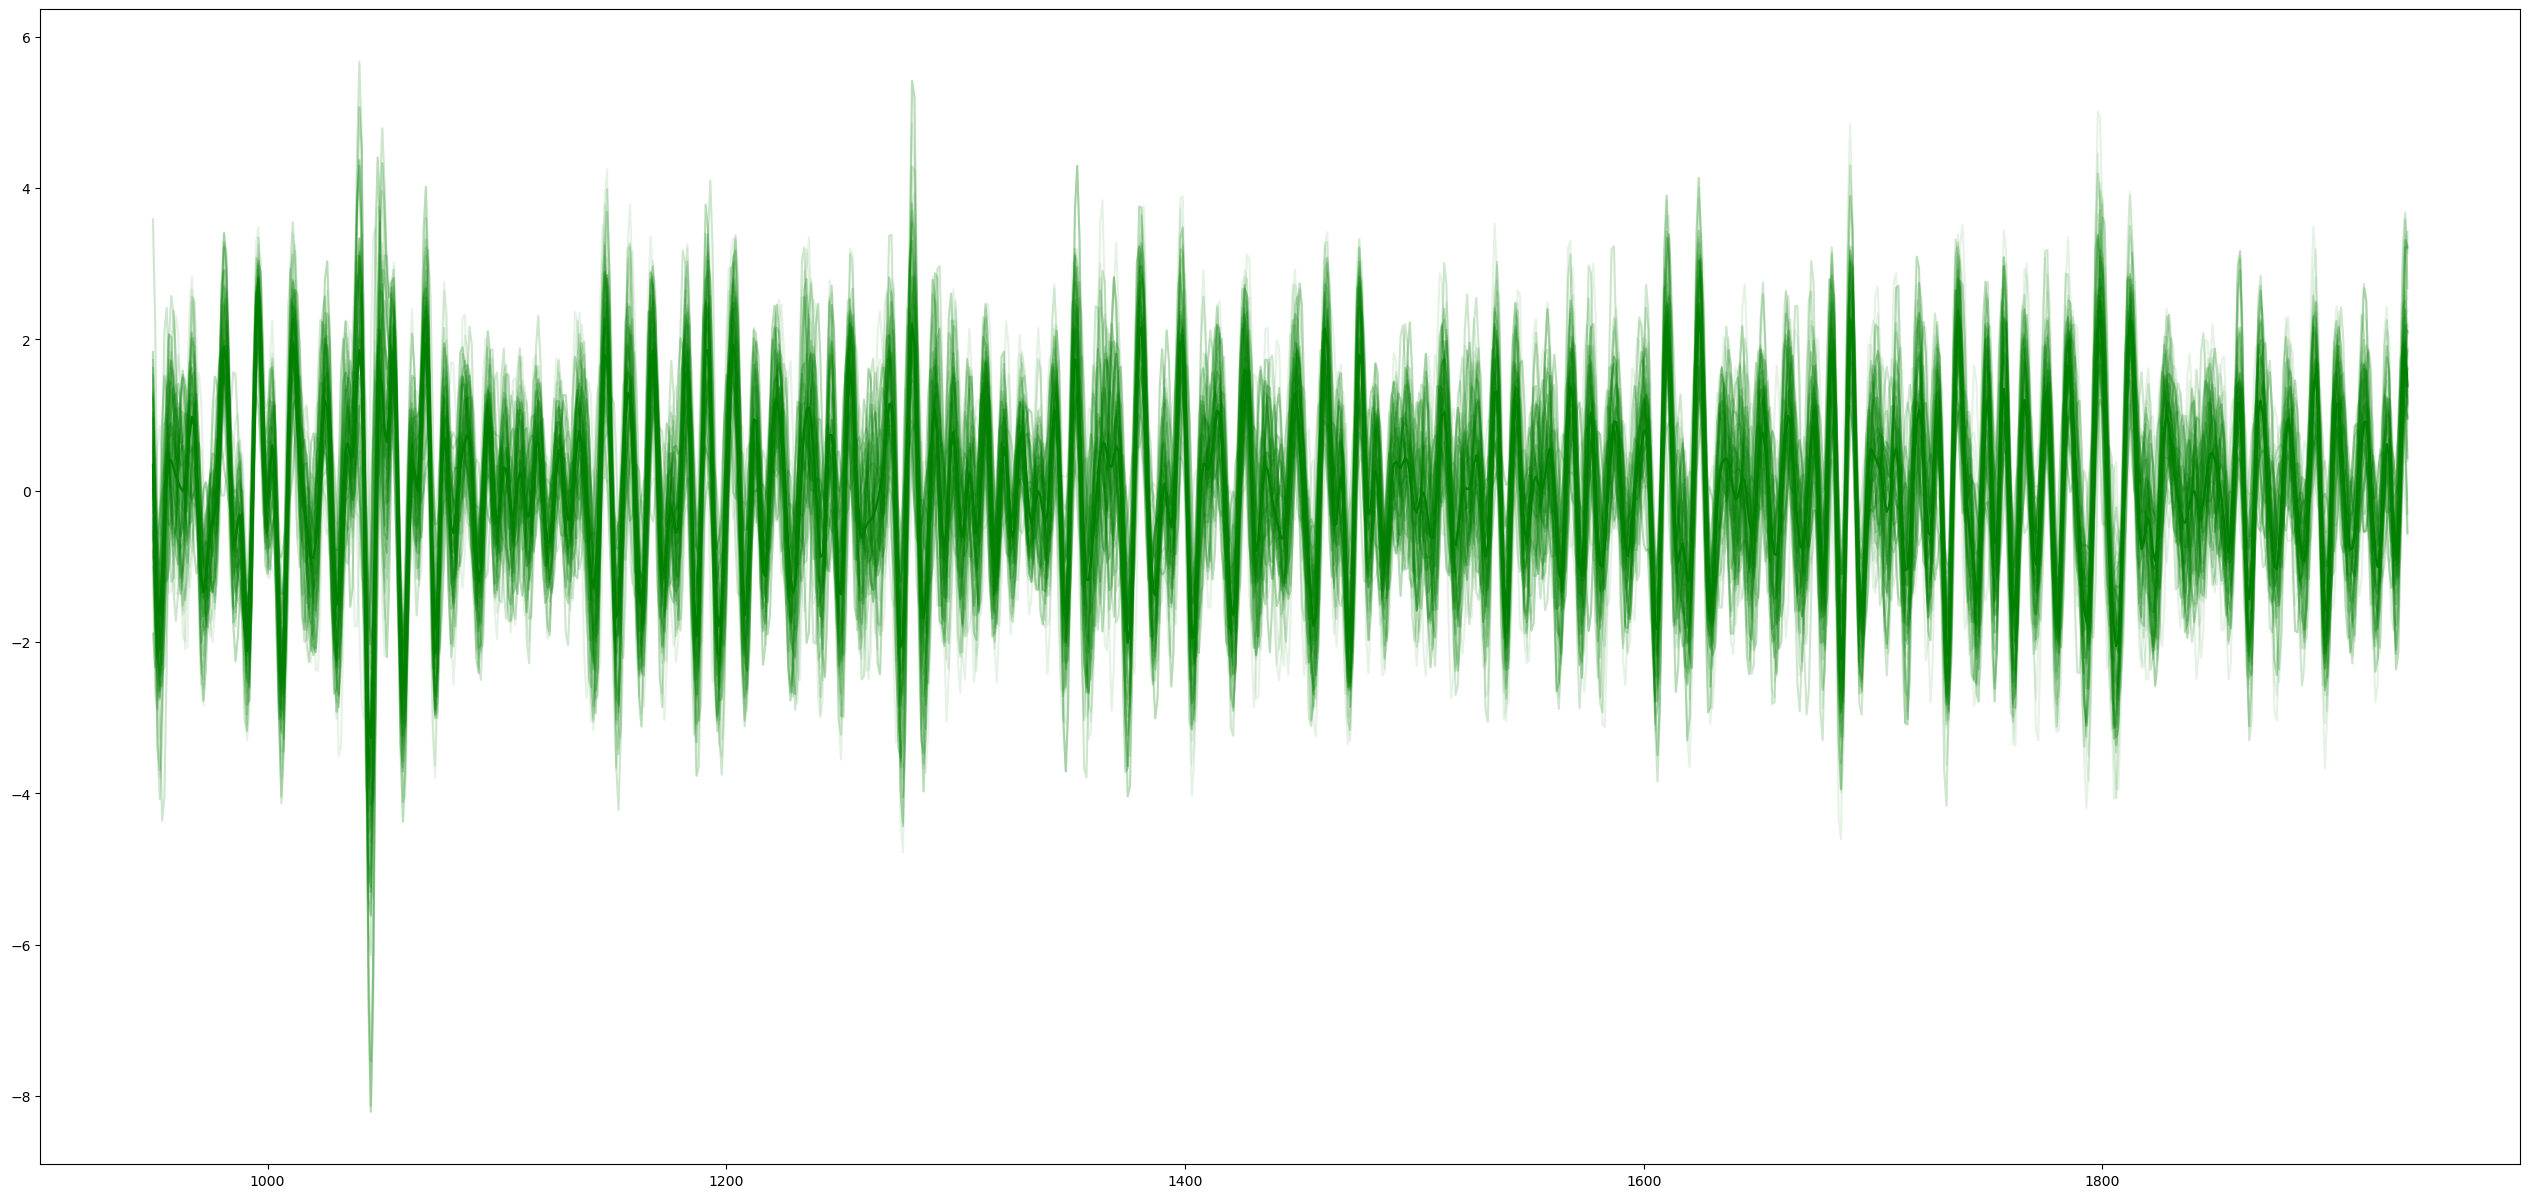

In [6]:
fig, axs = plt.subplots(1, figsize=(32, 15), sharex=True)
axs.plot(resampler.annual, sig, color="g")
for i in np.random.randint(100, size=100):
    axs.plot(resampler.annual, new_signal[i, :], color="g", alpha=0.1)

#plt.xlim(0,100)
# axs.axvline(1520)
# axs.axvline(1540)
# axs.axvline(1560)
# axs.axvline(1580)
# axs.axvline(1600)

[[ 1.62048469 -0.65806891 -2.37707922 ...  1.6640163   3.22011593
   3.21277008]
 [ 0.61297185 -1.17444024 -2.19888978 ...  1.55002309  2.56768799
   2.16985238]
 [ 0.29484896 -0.63843669 -1.50449091 ...  1.04516867  1.18327281
   0.95418951]
 ...
 [-0.90435624 -2.03889774 -2.28995237 ...  2.27443308  1.88113314
   0.63789915]
 [ 1.38122488  0.36394742 -0.71757563 ...  1.23119035  1.86836029
   1.94501886]
 [ 1.25439142 -0.5935789  -2.24049461 ...  0.98413758  2.09197914
   2.29664024]]


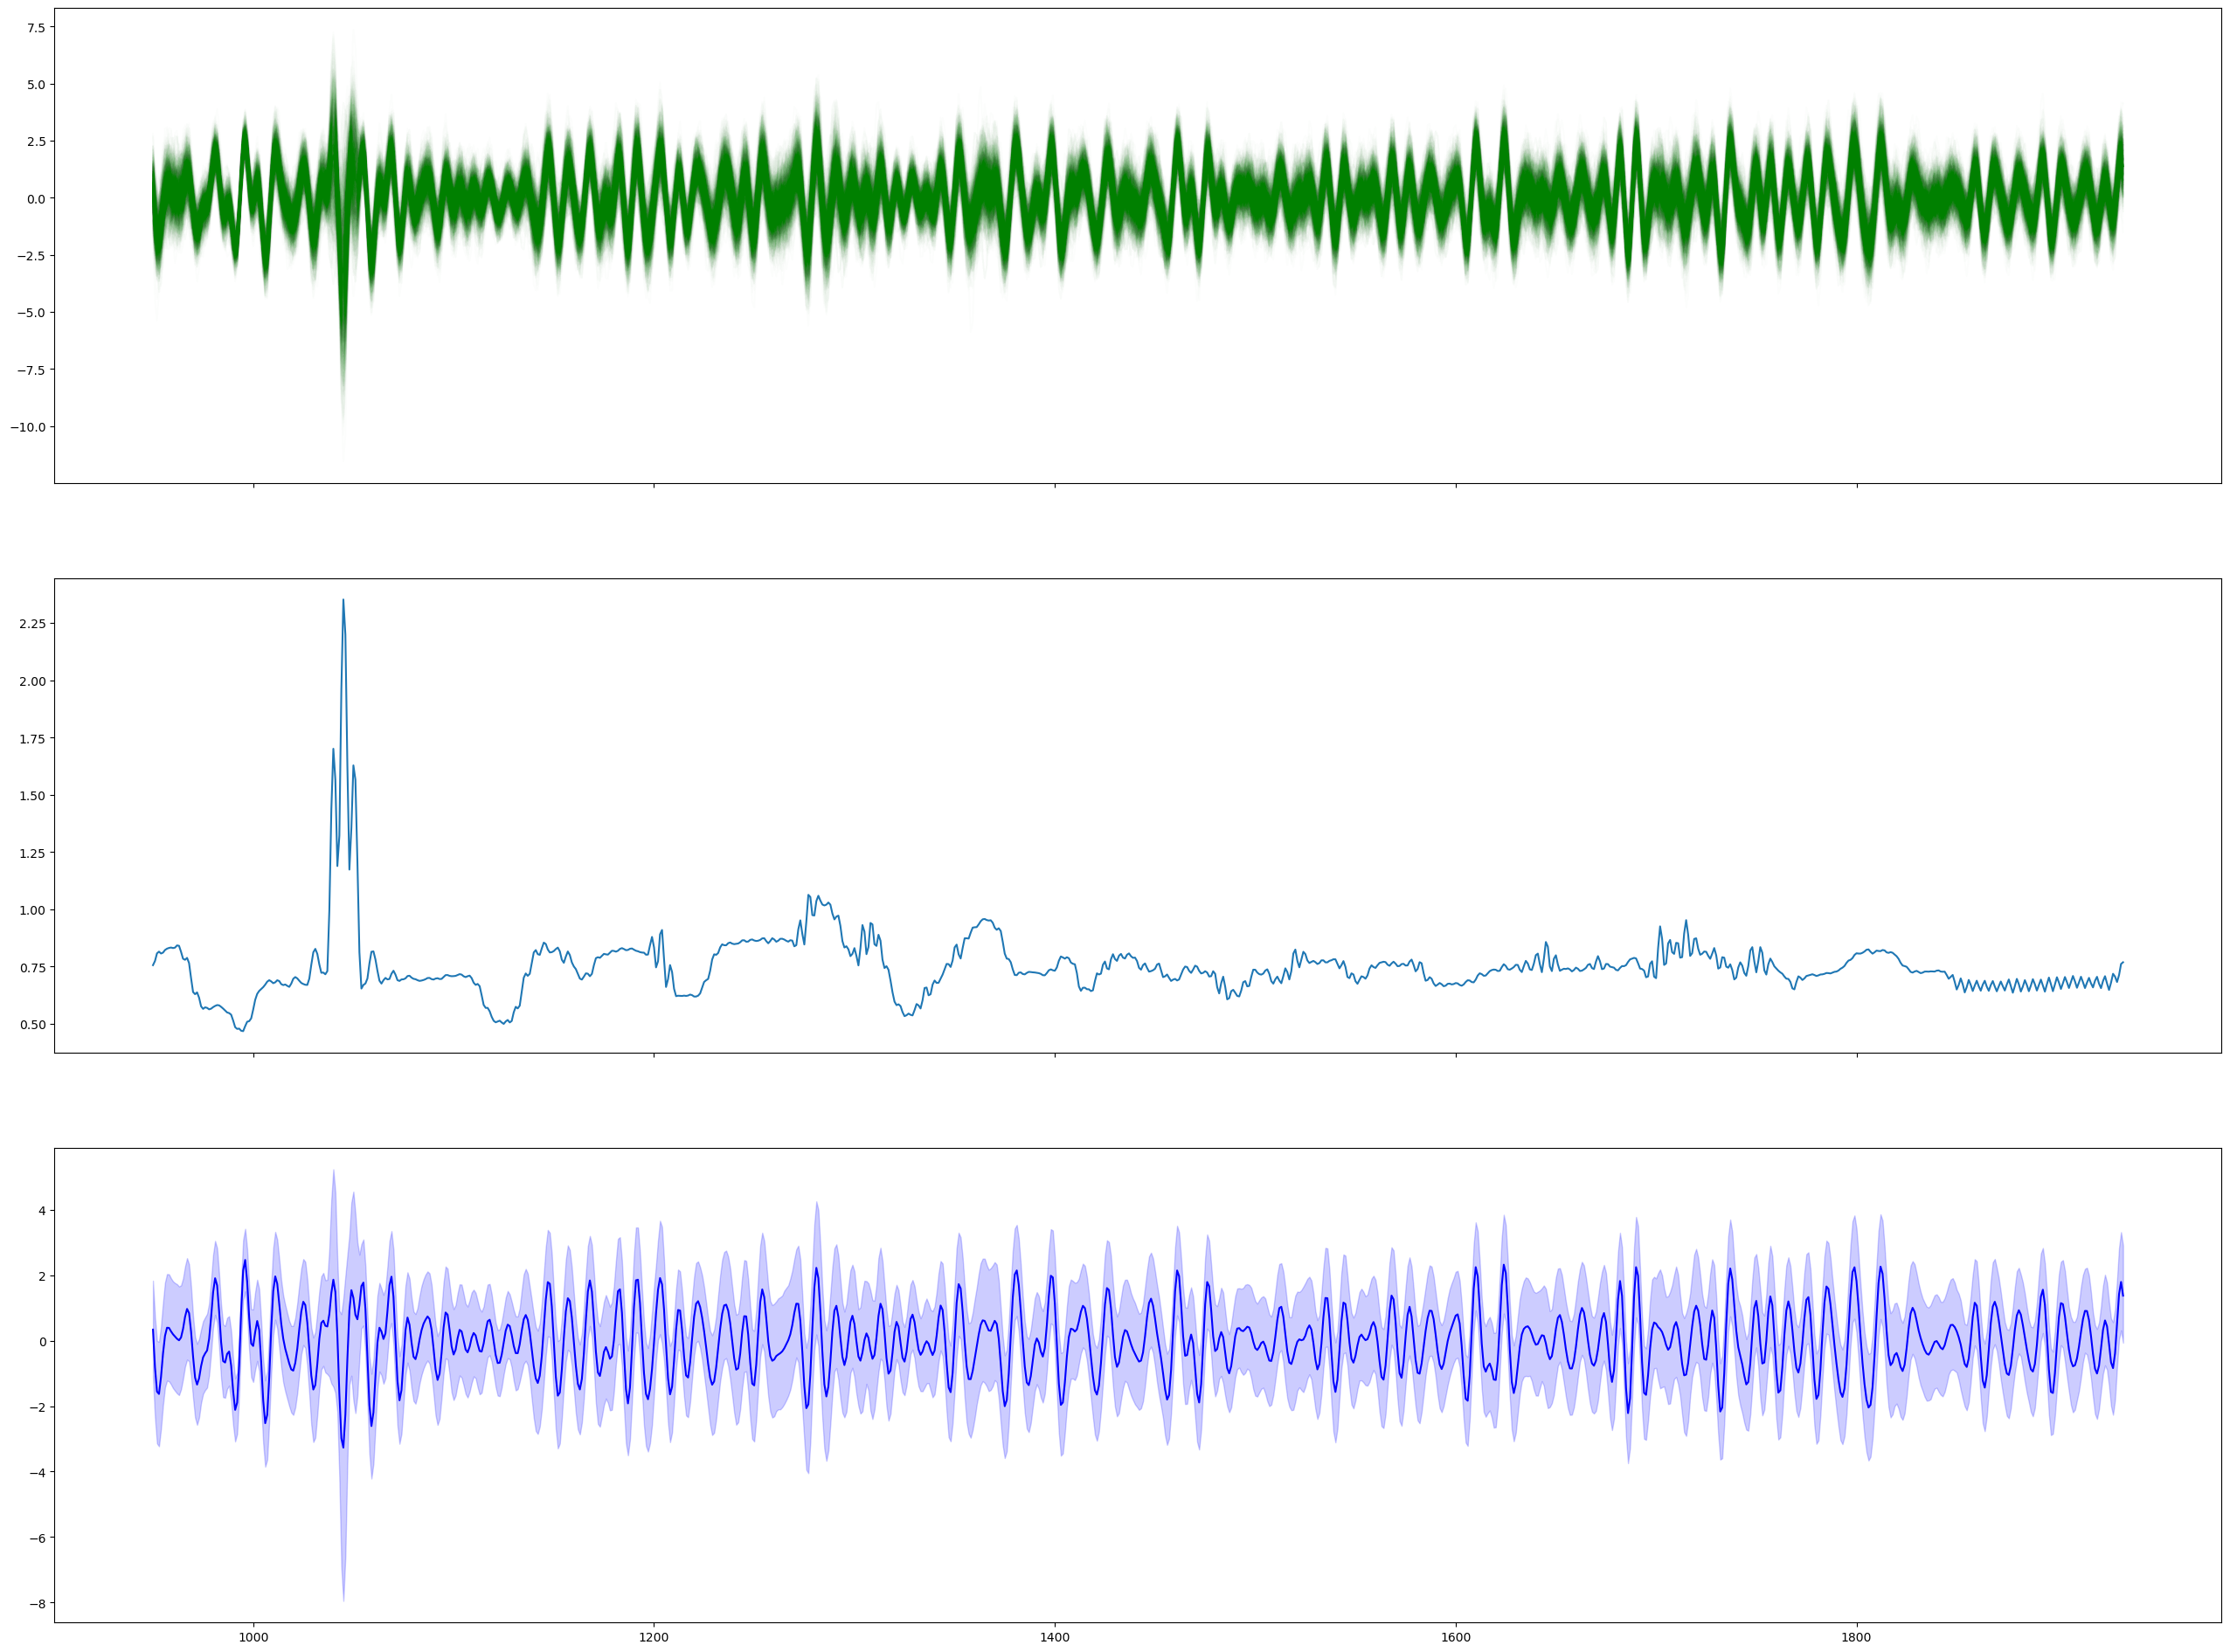

In [7]:
fig, axs = plt.subplots(3, figsize=(32, 24), sharex=True)
for i in np.random.randint(10000, size=1000):
    axs[0].plot(resampler.annual, new_signal[i, :], color="g", alpha=0.01)
axs[0].plot(resampler.annual, sig, color="g")
axs[1].plot(resampler.annual, np.std(new_signal, axis=0))
l, m, u = np.percentile(new_signal, (2.5, 50, 97.5 ), axis=0)
axs[2].fill_between(resampler.annual, l, u, color = 'b', alpha=0.2)
axs[2].plot(resampler.annual, m, color = 'b')
print(new_signal)

In [8]:
zero_signal=new_signal.copy()
nsamples = new_signal.shape[0]
zero_signal -= new_signal.mean(axis=1)[:,None]
norm_signal=zero_signal/np.sqrt((zero_signal**2).sum(axis=1))[:,None]

In [9]:
covmat = np.corrcoef(norm_signal)

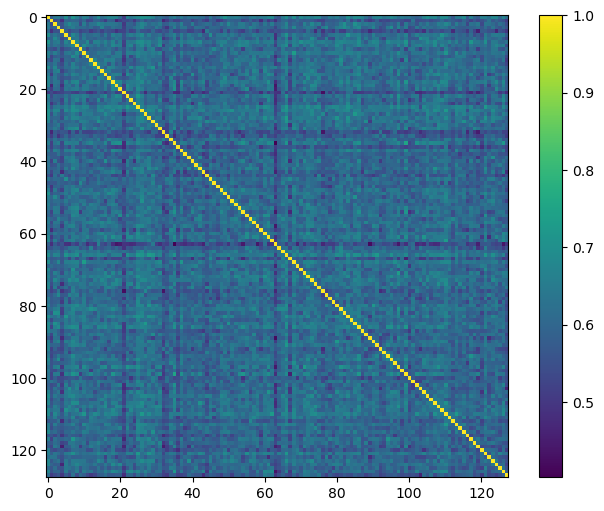

In [10]:
plt.imshow(covmat[:128,:128])
plt.colorbar()

Median 0.6051442893070516 SD 0.047270609527266895


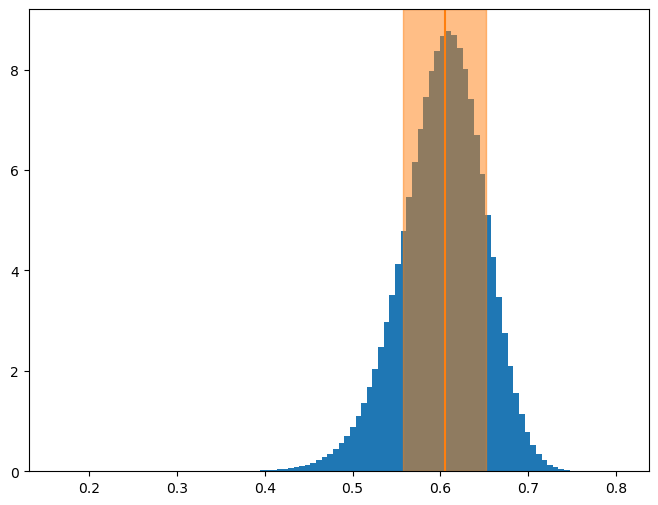

In [11]:
off_diag = covmat[~np.eye(covmat.shape[0],dtype=bool)]
plt.hist(off_diag,bins=100,density=True);
m, s = np.nanmedian(off_diag), np.nanstd(off_diag)
plt.axvline(m,color='C1')
plt.axvspan(m-s,m+s,color='C1',alpha=0.5)
print("Median",m,"SD",s)